In [1]:
%load_ext autoreload
%autoreload 2
from bosonicplus.base import State
from bosonicplus.states.coherent import order_infidelity_fock_coherent, gen_fock_superpos_coherent
from bosonicplus.states.nongauss import prepare_fock_coherent
from bosonicplus.fidelity import overlap_with_wigner

from bosonicplus.plotting import plot_wig

from matplotlib import pyplot as plt
import numpy as np

from math import factorial

In [2]:
from os import chdir
chdir('../')

In [3]:
#Plotting stuff

import matplotlib as mpl
from matplotlib import pyplot as plt

colwidth = 3.41667
fs = 8
mpl.rcParams.update({'font.size': fs, 
                     "text.usetex":  True, 
                     'font.family':'serif',
                     'xtick.labelsize': 6, 
                     'ytick.labelsize':6 })

fig_kwargs = {'dpi':800, 'bbox_inches': 'tight'}

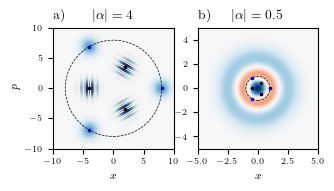

In [4]:

fig, axes = plt.subplots(1,2,figsize = (colwidth, 0.5 * colwidth))
hbar = 2
N = 2
eps1 = 4
eps2 = 0.5

def make_plot(ax, N, eps, xmax = 10, xres = 300):


    x = np.linspace(-xmax,xmax,xres)
    
    state = prepare_fock_coherent(N,1,eps)
    state.normalise() #To get the log_norm
    
    means = state.means
    W = state.get_wigner_log(x,x).real

    infid = order_infidelity_fock_coherent(N, eps)
    
    im = plot_wig(W, x, x, colorbar = False, ax=ax, contourf=True)
    
    Drawing_uncolored_circle = plt.Circle( (0,0 ), np.sqrt(2*hbar)*eps ,fill = False, color = 'black' , linestyle='dashed',linewidth=0.5)
    
    theta = 2*np.pi/(N+1)
    betas = np.zeros(N+1, dtype='complex')
        
    for l in np.arange(N+1):
        betas[l] = eps * np.exp(1j * theta * l)
    
    ax.scatter(means[0:state.num_k,0].real, means[0:state.num_k,1].real, marker='.',color='blue', s= 10)
    ax.scatter(means[state.num_k:,0].real, means[state.num_k:,1].real, marker='.',color='k', s  =10)
        
    #im_eps = ax.text(0.65,0.85, ',size = 10, transform=ax.transAxes )
    ax.set_title(rf'$|\alpha| = {np.round(eps,3)}$')
    ax.set_aspect(1)
    im_circ = ax.add_artist(Drawing_uncolored_circle )

    #ax.set_axis_off

make_plot(axes[0], N ,eps1)
axes[0].set_title('a)', loc = 'left')
make_plot(axes[1], N, eps2, xmax = 5)
axes[1].set_title('b)', loc = 'left')
axes[1].set_ylabel('')
plt.savefig(f'figspaper/linear_comb_gaussians/radius.pdf',**fig_kwargs)
plt.show()

#title = ax.text(0.25,1.01,r' $\mathcal{F}= $'+'{:.5f} with Fock {}'.format(fid,N),transform=ax.transAxes, fontsize =12 )




